# Solver for the two-body problem

In the two-body problem, the motion of each body is governed by Newton's law of universal gravitation. For the motion of Earth around the Sun, we consider Earth as the smaller body orbiting around the much larger Sun.

Let's denote:

- $m_1$ as the mass of the Sun,
- $m_2$ as the mass of the Earth,
- $\mathbf{r}$ as the position vector of Earth relative to the Sun,
- $\mathbf{F}$ as the gravitational force exerted on Earth by the Sun.

According to Newton's law of universal gravitation, the gravitational force $\mathbf{F}$ exerted by the Sun on Earth is given by:

$$
\mathbf{F} = -\frac{G \cdot m_1 \cdot m_2}{|\mathbf{r}|^2} \cdot \frac{\mathbf{r}}{|\mathbf{r}|}
$$

Where:
- $G$ is the gravitational constant,
- $|\mathbf{r}|$ is the magnitude of the position vector $\mathbf{r}$.

This force causes the acceleration of Earth, according to Newton's second law:

$$
\mathbf{F} = m_2 \cdot \mathbf{a}
$$

Where $\mathbf{a}$ is the acceleration vector of Earth.

Now, since Earth's motion is in a plane (approximately the ecliptic plane), we can describe its motion using polar coordinates $r$ (distance from the Sun) and $\theta$ (angular position).

By writing $\mathbf{r}$ in terms of $r$ and $\theta$, and considering the relationship between position, velocity, and acceleration in polar coordinates, we can derive the second-order differential equation that governs Earth's motion around the Sun.

$$
\frac{d^2 r}{dt^2} - r \left( \frac{d\theta}{dt} \right)^2 = -\frac{G \cdot m_1}{r^2}
$$

$$
\frac{d^2 \theta}{dt^2} + 2 \frac{dr}{dt} \frac{d\theta}{dt} = 0
$$

These are the second-order differential equations that describe the motion of Earth around the Sun in the two-body problem. You can solve them numerically using methods like the Runge-Kutta method or any other suitable numerical integration technique.

### Expressing in terms of Potential

The gravitational force can also be expressed in terms of the gravitational potential. The gravitational potential energy $U$ between two point masses is given by:

$$
U = -\frac{G \cdot m_1 \cdot m_2}{|\mathbf{r}|}
$$

Where $G$ is the gravitational constant, $m_1$ and $m_2$ are the masses of the two bodies, and $|\mathbf{r}|$ is the distance between them.

The force $\mathbf{F}$ acting on the smaller body (Earth in this case) due to this potential is the negative gradient of the potential energy:

$$
\mathbf{F} = -\nabla U
$$

In radial coordinates (assuming central force), this simplifies to:

$$
F_r = -\frac{dU}{dr}
$$

Thus, we can express the gravitational force acting on Earth due to the Sun's potential as:

$$
F_r = -\frac{d}{dr}\left(-\frac{G \cdot m_1 \cdot m_2}{r}\right)
$$

$$
F_r = -\frac{d}{dr}\left(-\frac{G \cdot M_{\text{sun}} \cdot M_{\text{earth}}}{r}\right)
$$

$$
F_r = -\left(\frac{G \cdot M_{\text{sun}} \cdot M_{\text{earth}}}{r^2}\right)
$$

Here, $M_{\text{sun}}$ represents the mass of the Sun and $M_{\text{earth}}$ represents the mass of the Earth.

Thus, the force acting on Earth due to the gravitational potential of the Sun is $F_r = -\frac{G \cdot M_{\text{sun}} \cdot M_{\text{earth}}}{r^2}$.

Now, using Newton's second law ($F = m \cdot a$), where $m$ is the mass of the Earth, we can equate this force to the acceleration $a$ of the Earth to get the differential equation in terms of the potential. This gives us the same result as before:

$$
\frac{d^2 r}{dt^2} = -\frac{G \cdot M_{\text{sun}}}{r^2}
$$

This equation, together with the equation governing angular motion, constitutes the equations of motion for the Earth in the gravitational field of the Sun.


In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

**Potential energy and force**

$F_r = -\frac{dU}{dr}$

I will compute the first derivative of the function U using SymPy.

In [6]:
G=6.674e-11 #m^3/kg*s^2
M_S=1.989e30 #kg
M_T=5.972e24 #kg

#potential energy
r,m1,m2=sp.symbols('r m1 m2')
def U(r,m1,m2): #r is the distance between the body with mass m1 and the one with mass m2
    return -G*m1*m2/r

#force
F=-sp.diff(U(r,m1,m2),r)

**Earth's position, velocity and acceleration**

In [7]:
#acceleration
def a(force,mass):
    return force/mass

#time step
dt=86400 #seconds in one day
#number of years
N=0.79
#total time for simulation in seconds
T=N*365.25*dt #seconds in N years
time=np.arange(0,T,dt)

#initial position of Earth (I chose the perihelion)
r_p=1.471e11 #m
E_pos=r_p

#initial velocity of Earth at perihelion
E_vel=30e3 #m/s

#lists to store position, velocity and acceleration for plotting
pos=[]
vel=[]
acc=[]

'''
#iteration to update Earth's position
for t in time: #every loop is one "dt", so one day
    pos.append(E_pos)
    force_t=F.subs({r:E_pos,m1:M_S,m2:M_T}) #force at time t
    a_t=a(force_t,M_T) #acceleration at time t
    E_pos+=E_vel*dt+0.5*a_t*dt**2 #update Earth's position
    E_vel+=a_t*dt #update Earth's velocity
    vel.append(E_vel)
    acc.append(a_t)
    #print(E_pos,E_vel,a_t)
'''
#'''
#iteration to update Earth's position
for t in time: #every loop is one "dt", so one day
    pos.append(E_pos)
    force_t=F.subs({r:E_pos,m1:M_S,m2:M_T}) #force at time t
    a_t=a(force_t,M_T) #acceleration at time t
    E_pos+=E_vel*dt #update Earth's position
    E_vel+=a_t*dt #update Earth's velocity
    vel.append(E_vel)
    acc.append(a_t)
    #print(E_pos,E_vel,a_t)
#'''

**Plot**
- Position vs time
- Velocity vs time
- Acceleration vs time

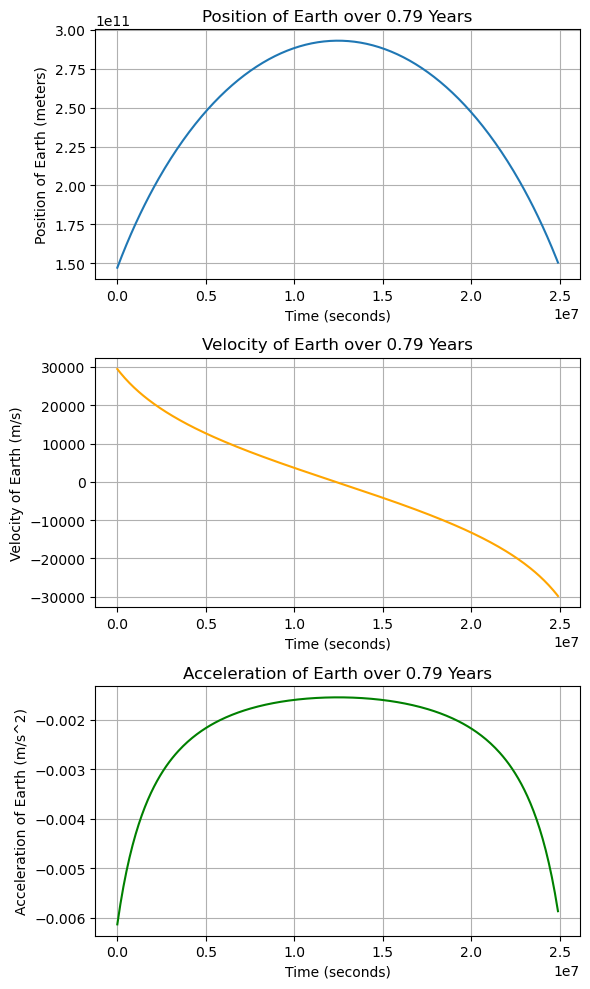

In [8]:
#plotting position
plt.figure(figsize=(6,10))
plt.subplot(3,1,1)
plt.plot(time,pos)
plt.xlabel('Time (seconds)')
plt.ylabel('Position of Earth (meters)')
if N==1:
    plt.title('Position of Earth over {} Year'.format(N))
else:
    plt.title('Position of Earth over {} Years'.format(N))
plt.grid(True)

#plotting velocity
plt.subplot(3,1,2)
plt.plot(time,vel,color='orange')
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity of Earth (m/s)')
if N==1:
    plt.title('Velocity of Earth over {} Year'.format(N))
else:
    plt.title('Velocity of Earth over {} Years'.format(N))
plt.grid(True)

#plotting acceleration
plt.subplot(3,1,3)
plt.plot(time,acc,color='green')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration of Earth (m/s^2)')
if N==1:
    plt.title('Acceleration of Earth over {} Year'.format(N))
else:
    plt.title('Acceleration of Earth over {} Years'.format(N))
plt.grid(True)

plt.tight_layout()
plt.show()

## Problem
I should see plots with *periodic behaviour*, but this is not happening!

If $N>0.79$ the plots start to diverge and lose their initial shape.

In order to try to solve this problem, I will use another, more precise, method (see *2_body_E_S_rk.ipynb*).